In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [8]:

import os
from pathlib import Path
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path("Titanic-Dataset.csv")
else:
    path = Path('Titanic-Dataset.csv')
    if not path.exists(): 
        import zipfile, kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)        

In [9]:
import torch , numpy as np , pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode= False, edgeitems=7)
pd.set_option('display.width', 140)

In [12]:
df= pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [16]:
df.fillna(modes, inplace= True) 

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
import numpy as np
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

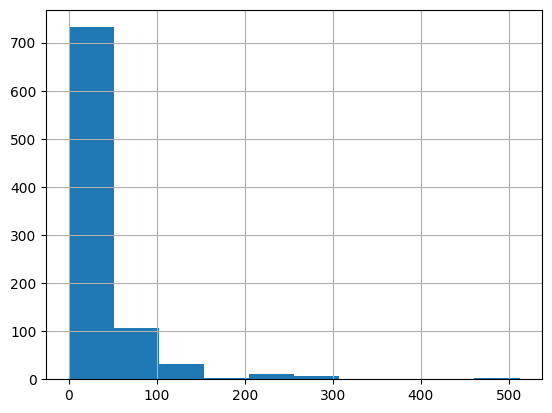

In [19]:
df['Fare'].hist()

array([[<Axes: title={'center': 'logFare'}>]], dtype=object)

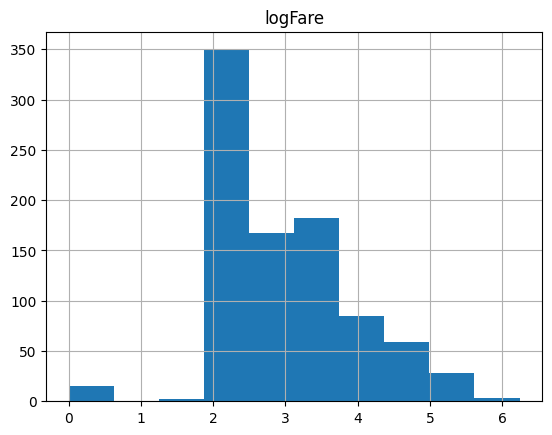

In [22]:
df[['logFare']].hist()

In [23]:
df['logFare'] = np.log(df['Fare']+1)

In [21]:
Pclasses = sorted(df['Pclass'].unique())
Pclasses

[np.int64(1), np.int64(2), np.int64(3)]

In [24]:
df.describe(include=('object'))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [26]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'logFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [27]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [28]:
from torch import tensor
t_dep = tensor(df.Survived)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [41]:
import numpy as np
import torch

indep_cols = ['Age', 'SibSp', 'Parch', 'logFare'] + added_cols

X = (
    df[indep_cols]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
)

X_np = X.to_numpy(dtype=np.float32)
t_indep = torch.from_numpy(X_np)

t_indep


tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [42]:
t_indep.shape

torch.Size([891, 12])

In [43]:
len(t_indep.shape)

2

#Linear model

In [45]:
torch.manual_seed(442)
n_coeff= t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [46]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [47]:
vals, indices = t_indep.max(dim = 0)
t_indep = t_indep / vals

In [48]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [49]:
preds = (t_indep*coeffs).sum(axis = 1)


In [51]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [52]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5382)

In [53]:
def calc_preds(coeffs   , t_indep): return (t_indep*coeffs).sum(axis = 1)
def calc_loss(coeffs, t_indep, t_dep): return torch.abs(calc_preds(coeffs=coeffs, t_indep=t_indep) - t_dep).mean()

#Gradient descent

In [54]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [55]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [56]:
loss.backward()

In [57]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

In [58]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.01)
    print(calc_loss(coeffs, t_indep, t_dep))
    

tensor(0.5362)


In [59]:
pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 21.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 5.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.1/737.1 kB 26.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24/24 [fastai]23/24 [fastai]sion]]
Note: you may need to restart the kernel to use updated packages.


In [60]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed = 42)(df)

In [61]:
trn_indep, val_indep= t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep   )

(713, 178)

In [63]:
def update_coeffs(coeffs, lr):coeffs.sub_(coeffs.grade*lr)


In [64]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:3f}", end =";")

In [65]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [ ]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [70]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)


In [71]:
coeffs = train_model(18, lr=0.2)

0.535861;0.502355;0.474659;0.387208;0.329128;0.295203;0.354038;0.434740;0.486269;0.492763;0.452993;0.395863;0.382556;0.362453;0.386605;0.412035;0.474196;0.470824;

In [68]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.4628),
 'SibSp': tensor(0.1385),
 'Parch': tensor(0.2409),
 'logFare': tensor(-0.2257),
 'Sex_male': tensor(-0.2653),
 'Sex_female': tensor(-0.3126),
 'Pclass_1': tensor(0.4888),
 'Pclass_2': tensor(0.3138),
 'Pclass_3': tensor(0.2785),
 'Embarked_C': tensor(-0.4373),
 'Embarked_Q': tensor(0.2105),
 'Embarked_S': tensor(0.3605)}

In [72]:
preds = calc_preds(coeffs, val_indep)

In [73]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True,  True, False, False, False, False,  True,  True, False, False, False, False, False,  True, False])

In [74]:
results.float().mean()

tensor(0.5787)

In [75]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5787)

# sigmoid

In [76]:
preds[:28]

tensor([ 0.1049, -0.2600,  0.4564,  0.5904,  0.6444,  0.5449,  0.4530,  0.6216, -0.0568,  0.3226,  0.2471,  0.3531,  0.2353, -0.2754,
         0.2493,  0.0260, -0.0278,  0.5829,  0.5781,  0.2315,  0.2687, -0.0036,  0.0770,  0.4083,  0.2839, -0.3616,  0.2287, -0.0198],
       grad_fn=<SliceBackward0>)

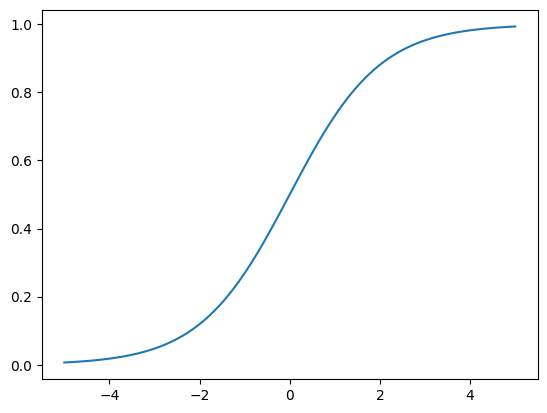

In [80]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()


In [81]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [83]:
def calc_preds(coeffs, t_indep):
    return t_indep @ coeffs


In [84]:
def calc_loss(coeffs, t_indep, t_dep):
    return torch.abs(calc_preds(coeffs=coeffs, t_indep=t_indep) - t_dep).mean()


In [85]:
coeffs = train_model(lr=100)

0.535861;30.286087;58.025486;55.279430;17.479748;37.112606;105.351334;68.333672;114.365677;134.398224;44.690292;123.404877;32.608601;228.709808;299.828156;197.330734;121.161293;237.748245;205.436661;101.620331;196.769989;204.959198;54.969833;263.073822;363.086914;282.225098;166.112076;247.830948;365.041504;297.686371;

In [86]:
acc(coeffs)

tensor(0.6517)

In [87]:
show_coeffs()

{'Age': tensor(16.0281),
 'SibSp': tensor(1.0326),
 'Parch': tensor(2.0875),
 'logFare': tensor(29.0553),
 'Sex_male': tensor(-5.8728),
 'Sex_female': tensor(36.2911),
 'Pclass_1': tensor(57.7103),
 'Pclass_2': tensor(74.0864),
 'Pclass_3': tensor(-99.7196),
 'Embarked_C': tensor(6.5738),
 'Embarked_Q': tensor(-32.3283),
 'Embarked_S': tensor(56.8837)}

In [92]:
tst_df = pd.read_csv(path)
path = "Titanic-Dataset.csv"
tst_df = pd.read_csv(path)


In [93]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [95]:
print(set(indep_cols) - set(tst_df.columns))


{'logFare'}


In [96]:
tst_df = tst_df.reindex(columns=indep_cols, fill_value=0)


In [101]:
print(tst_df.columns.tolist())


['Age', 'SibSp', 'Parch', 'logFare', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [108]:
print(tst_df.dtypes)


Age           float64
SibSp           int64
Parch           int64
logFare         int64
Sex_male         bool
Sex_female       bool
Pclass_1         bool
Pclass_2         bool
Pclass_3         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [109]:
tst_df = tst_df.astype(float)


In [110]:
tst_indep = torch.tensor(tst_df.values, dtype=torch.float32)
tst_indep = tst_indep / vals


In [111]:
tst_df = tst_df.apply(pd.to_numeric, errors='coerce')
tst_df = tst_df.fillna(0)


In [112]:
tst_indep = torch.tensor(tst_df.values, dtype=torch.float32)


In [113]:
# Align with training columns
tst_df = tst_df.reindex(columns=indep_cols, fill_value=0)

# 🔑 Force numeric
tst_df = tst_df.astype(float)

# Tensor conversion + scaling
tst_indep = torch.tensor(tst_df.values, dtype=torch.float32)
tst_indep = tst_indep / vals


In [115]:
tst_df['Survived'] = (calc_preds(coeffs, tst_indep) > 0.5).int()


In [121]:
tst_raw = pd.read_csv("Titanic-Dataset.csv")  # or test.csv
tst_ids = tst_raw['PassengerId']


In [122]:
tst_df['Survived'] = (calc_preds(coeffs, tst_indep) > 0.5).int()


In [123]:
sub_df = pd.DataFrame({
    'PassengerId': tst_ids.values,
    'Survived': tst_df['Survived'].values
})

sub_df.to_csv('sub.csv', index=False)


In [125]:
!head sub.csv

PassengerId,Survived
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,0


In [126]:
(val_indep*coeffs).sum(axis=1)

tensor([  94.9227, -123.0207,  -84.3976,  148.7730,  142.3925,  146.4290,  -43.2824,  185.1574,  -29.1540,  -36.8997,  -32.1070,  -80.7541,
         -35.8101,  -80.7819,  -32.5188,  133.1750,  137.1820,  187.9620,  148.2551,   10.2362,  -33.7251,  135.3789,  130.8285,  197.2083,
         -34.9916, -117.9695,    5.7527,  136.5810,  -34.7426,  -80.8501,  183.8498,   16.0151,  -34.7268,  -32.3428,   96.1248,   11.2430,
         134.6928,  125.1829,  -33.6450,    8.7835,  140.2746,  -33.6450,  148.4501,  127.2271,  -34.4464,   20.6625,  -24.6363,  -31.5368,
        -123.4604,    7.6873,   49.5836,  -27.5512,  -29.5022,  -33.9898,  141.6770,  142.8791, -123.0140,  -28.3015,  -34.2461,  -29.7810,
          80.0583,  -35.4611,  140.7366,  -34.3109,  191.5499,  133.5767,  142.1921,  -25.8813, -116.3783,  188.7268,  -33.3243,  -38.3714,
         142.6788,  -32.9532,  128.8608,  -35.3915,  -33.6450,  137.4644,  141.1904,  147.4219,  143.0777,  131.6850,  -33.9254,  -34.0759,
         188.6494,  

In [127]:
val_indep@coeffs

tensor([  94.9227, -123.0207,  -84.3976,  148.7730,  142.3925,  146.4290,  -43.2824,  185.1574,  -29.1540,  -36.8997,  -32.1070,  -80.7541,
         -35.8101,  -80.7819,  -32.5188,  133.1750,  137.1820,  187.9620,  148.2551,   10.2362,  -33.7251,  135.3789,  130.8285,  197.2083,
         -34.9916, -117.9695,    5.7527,  136.5810,  -34.7426,  -80.8501,  183.8498,   16.0151,  -34.7268,  -32.3428,   96.1248,   11.2430,
         134.6928,  125.1829,  -33.6450,    8.7835,  140.2746,  -33.6450,  148.4501,  127.2271,  -34.4464,   20.6625,  -24.6363,  -31.5368,
        -123.4604,    7.6873,   49.5836,  -27.5512,  -29.5022,  -33.9898,  141.6770,  142.8791, -123.0140,  -28.3015,  -34.2461,  -29.7810,
          80.0583,  -35.4611,  140.7366,  -34.3109,  191.5499,  133.5767,  142.1921,  -25.8813, -116.3783,  188.7268,  -33.3243,  -38.3714,
         142.6788,  -32.9532,  128.8608,  -35.3915,  -33.6450,  137.4644,  141.1904,  147.4219,  143.0777,  131.6850,  -33.9254,  -34.0759,
         188.6494,  

In [128]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [129]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [130]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [132]:
def calc_loss(coeffs, t_indep, t_dep):
    preds = calc_preds(coeffs, t_indep)
    return torch.abs(preds - t_dep).mean()


In [133]:
acc(coeffs)

tensor(0.4903)

# Neural Network

In [134]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [135]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [136]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [137]:
coeffs = train_model(lr=1.4)

0.543392;0.532098;0.519845;0.504920;0.487342;0.465668;0.438601;0.406885;0.373191;0.343141;0.319294;0.300960;0.286330;0.274294;0.264392;0.256336;0.249826;0.244550;0.240245;0.236701;0.233751;0.231266;0.229147;0.227323;0.225728;0.224317;0.223053;0.221910;0.220866;0.219903;

In [138]:
coeffs = train_model(lr=20)

0.543392;0.399745;0.260499;0.390292;0.220539;0.211462;0.197341;0.194822;0.193322;0.193053;0.192891;0.192778;0.192696;0.192635;0.192586;0.192548;0.192520;0.192495;0.192474;0.192456;0.192439;0.192426;0.192413;0.192401;0.192390;0.192380;0.192372;0.192364;0.192356;0.192349;

In [139]:
acc(coeffs)

tensor(0.8258)

# Deep Learning


In [140]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [141]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [142]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [143]:
coeffs = train_model(lr=4)

0.520997;0.482779;0.426969;0.378544;0.378532;0.378519;0.378503;0.378485;0.378462;0.378433;0.378398;0.378352;0.378290;0.378204;0.378076;0.377864;0.377439;0.376302;0.371365;0.332869;0.238553;0.223847;0.207889;0.204072;0.202976;0.203162;0.207372;0.197232;0.195936;0.195130;

In [144]:
acc(coeffs)

tensor(0.8258)